In [1]:
import pymongo
from spearmint.utils import compression
from spearmint.utils import functions
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from spearmint.tasks import input_space
sns.set()

### Connecting MongoDB server

In [2]:
mongo_conn = pymongo.MongoClient('127.0.0.1',27017)
mongo_conn.list_database_names()

[u'admin', u'config', u'local', u'spearmint']

In [3]:
mongo_db = mongo_conn['spearmint']

### Loading document from database

In [4]:
collection_list = mongo_db.list_collection_names()

In [5]:
exp_name = "sep_simple"

In [6]:
jobs_initial5_Mk10_Mj1_exp = []
jobs_initial5_Mk50_Mj1_exp = []
jobs_initial5_Mk200_Mj1_exp = []
jobs_initial5_Mk250_Mj1_exp = []
jobs_initial5_Mk300_Mj1_exp = []

jobs_cumulative_saa_multi_exp = []

recomm_initial5_Mk10_Mj1_exp = []
recomm_initial5_Mk50_Mj1_exp = []
recomm_initial5_Mk200_Mj1_exp = []
recomm_initial5_Mk250_Mj1_exp = []
recomm_initial5_Mk300_Mj1_exp = []

recomm_cumulative_saa_multi_exp = []

for i in range(25):
    if "%s_initial5_Mk10_Mj1-%d.jobs"%(exp_name,i) in collection_list: jobs_initial5_Mk10_Mj1_exp.append(mongo_db["%s_initial5_Mk10_Mj1-%d.jobs"%(exp_name,i)]) 
    if "%s_initial5_Mk50_Mj1-%d.jobs"%(exp_name,i) in collection_list: jobs_initial5_Mk50_Mj1_exp.append(mongo_db["%s_initial5_Mk50_Mj1-%d.jobs"%(exp_name,i)]) 
    if "%s_initial5_Mk200_Mj1-%d.jobs"%(exp_name,i) in collection_list: jobs_initial5_Mk200_Mj1_exp.append(mongo_db["%s_initial5_Mk200_Mj1-%d.jobs"%(exp_name,i)]) 
    if "%s_initial5_Mk250_Mj1-%d.jobs"%(exp_name,i) in collection_list: jobs_initial5_Mk250_Mj1_exp.append(mongo_db["%s_initial5_Mk250_Mj1-%d.jobs"%(exp_name,i)]) 
    if "%s_initial5_Mk300_Mj1-%d.jobs"%(exp_name,i) in collection_list: jobs_initial5_Mk300_Mj1_exp.append(mongo_db["%s_initial5_Mk300_Mj1-%d.jobs"%(exp_name,i)]) 
    if "%s_cumulative_saa_multi-%d.jobs"%(exp_name,i) in collection_list: jobs_cumulative_saa_multi_exp.append(mongo_db["%s_cumulative_saa_multi-%d.jobs"%(exp_name,i)]) 
    
    if "%s_initial5_Mk10_Mj1-%d.recommendations"%(exp_name,i) in collection_list: recomm_initial5_Mk10_Mj1_exp.append(mongo_db["%s_initial5_Mk10_Mj1-%d.recommendations"%(exp_name,i)]) 
    if "%s_initial5_Mk50_Mj1-%d.recommendations"%(exp_name,i) in collection_list: recomm_initial5_Mk50_Mj1_exp.append(mongo_db["%s_initial5_Mk50_Mj1-%d.recommendations"%(exp_name,i)]) 
    if "%s_initial5_Mk200_Mj1-%d.recommendations"%(exp_name,i) in collection_list: recomm_initial5_Mk200_Mj1_exp.append(mongo_db["%s_initial5_Mk200_Mj1-%d.recommendations"%(exp_name,i)]) 
    if "%s_initial5_Mk250_Mj1-%d.recommendations"%(exp_name,i) in collection_list: recomm_initial5_Mk250_Mj1_exp.append(mongo_db["%s_initial5_Mk250_Mj1-%d.recommendations"%(exp_name,i)]) 
    if "%s_initial5_Mk300_Mj1-%d.recommendations"%(exp_name,i) in collection_list: recomm_initial5_Mk300_Mj1_exp.append(mongo_db["%s_initial5_Mk300_Mj1-%d.recommendations"%(exp_name,i)]) 
    if "%s_cumulative_saa_multi-%d.recommendations"%(exp_name,i) in collection_list: recomm_cumulative_saa_multi_exp.append(mongo_db["%s_cumulative_saa_multi-%d.recommendations"%(exp_name,i)]) 

### Get objective method gets the predicted optimal value in GP model

In [7]:
initial5_Mk10_Mj1_objs = functions.get_objective(recomm_initial5_Mk10_Mj1_exp)
initial5_Mk50_Mj1_objs = functions.get_objective(recomm_initial5_Mk50_Mj1_exp)
initial5_Mk200_Mj1_objs = functions.get_objective(recomm_initial5_Mk200_Mj1_exp)
initial5_Mk250_Mj1_objs = functions.get_objective(recomm_initial5_Mk250_Mj1_exp)
initial5_Mk300_Mj1_objs = functions.get_objective(recomm_initial5_Mk300_Mj1_exp)

cumulative_saa_multi_objs = functions.get_objective(recomm_cumulative_saa_multi_exp)

In [8]:
locs_initial5_Mk10_Mj1_exp = functions.get_recomm_loc(recomm_initial5_Mk10_Mj1_exp)
locs_initial5_Mk50_Mj1_exp = functions.get_recomm_loc(recomm_initial5_Mk50_Mj1_exp)
locs_initial5_Mk200_Mj1_exp = functions.get_recomm_loc(recomm_initial5_Mk200_Mj1_exp)
locs_initial5_Mk250_Mj1_exp = functions.get_recomm_loc(recomm_initial5_Mk250_Mj1_exp)
locs_initial5_Mk300_Mj1_exp = functions.get_recomm_loc(recomm_initial5_Mk300_Mj1_exp)

locs_cumulative_saa_multi_exp = functions.get_recomm_loc(recomm_cumulative_saa_multi_exp)

### Getting immediate Regret IR measure

In [9]:
import math

def branin(x, y):

    result = np.square(y - (5.1/(4*np.square(math.pi)))*np.square(x) + 
         (5/math.pi)*x - 6) + 10*(1-(1./(8*math.pi)))*np.cos(x) + 10
    
    result = float(result)
    
    return result

In [10]:
func = branin

In [11]:
opt_val = 0.397887

In [12]:
def get_sugg_obj_exp(locs_exp):
    obj_exp = []
    for exp_num in range(len(locs_exp)):
        objs_iter = []
        locs_cur_exp = locs_exp[exp_num]
        
        for idx in range(len(locs_exp[exp_num])):
            objs_iter.append(func(*locs_cur_exp[idx]))
            
        obj_exp.append(objs_iter)
        
    return obj_exp

In [13]:
def log_ir(input_list):
    return np.log10(np.abs(opt_val - func(*input_list)))

In [14]:
def get_irs_whole_exp(locs_exp):
    irs_exp = []
    for exp_num in range(len(locs_exp)):
        irs_iter = []
        locs_cur_exp = locs_exp[exp_num]
        
        for idx in range(len(locs_exp[0])):
            
            irs_iter.append(log_ir(locs_cur_exp[idx]))
            
        irs_exp.append(irs_iter)
        
    return irs_exp

In [15]:
def get_avg_irs(irs_exp):
    avg_irs = []
    for iter_num in range(len(irs_exp[0])):
        cur_iter_irs = []
        for exp_num in range(len(irs_exp)):
            cur_iter_irs.append(irs_exp[exp_num][iter_num])
            
        avg_irs.append(np.average(cur_iter_irs))
        
    return avg_irs


In [16]:
def get_median_irs(irs_exp):
    median_irs = []
    for iter_num in range(len(irs_exp[0])):
        cur_iter_irs = []
        for exp_num in range(len(irs_exp)):
            cur_iter_irs.append(irs_exp[exp_num][iter_num])
        
        median_irs.append(np.median(cur_iter_irs))
        
    return median_irs

In [18]:
def get_std_err_irs(irs_exp):
    std_err_irs = []
    for iter_num in range(len(irs_exp[0])):
        cur_iter_irs = []
        for exp_num in range(len(irs_exp)):
            cur_iter_irs.append(irs_exp[exp_num][iter_num])
            
        std_err_irs.append(np.std(cur_iter_irs))
        
    return std_err_irs

### Getting the "real" value of functions at suggested locations

In [32]:
len(sugg_obj_initial5_Mk200_Mj1_exp)

25

In [19]:
sugg_obj_initial5_Mk10_Mj1_exp = get_sugg_obj_exp(locs_initial5_Mk10_Mj1_exp)
sugg_obj_initial5_Mk50_Mj1_exp = get_sugg_obj_exp(locs_initial5_Mk50_Mj1_exp)
sugg_obj_initial5_Mk200_Mj1_exp = get_sugg_obj_exp(locs_initial5_Mk200_Mj1_exp)
sugg_obj_initial5_Mk250_Mj1_exp = get_sugg_obj_exp(locs_initial5_Mk250_Mj1_exp)
sugg_obj_initial5_Mk300_Mj1_exp = get_sugg_obj_exp(locs_initial5_Mk300_Mj1_exp)

sugg_obj_cumulative_saa_multi_exp =get_sugg_obj_exp(locs_cumulative_saa_multi_exp)

#### averaging values of each experiments

In [20]:
avg_sugg_obj_initial5_Mk10_Mj1 = np.average(sugg_obj_initial5_Mk10_Mj1_exp, axis=0)
avg_sugg_obj_initial5_Mk50_Mj1 = np.average(sugg_obj_initial5_Mk50_Mj1_exp, axis=0)
avg_sugg_obj_initial5_Mk200_Mj1 = np.average(sugg_obj_initial5_Mk200_Mj1_exp, axis=0)
avg_sugg_obj_initial5_Mk250_Mj1 = np.average(sugg_obj_initial5_Mk250_Mj1_exp, axis=0)
avg_sugg_obj_initial5_Mk300_Mj1 = np.average(sugg_obj_initial5_Mk300_Mj1_exp, axis=0)

avg_sugg_obj_cumulative_multi = np.average(sugg_obj_cumulative_saa_multi_exp, axis=0)

#### Standard Error values of each experiments

In [52]:
sugg_obj_initial5_Mk10_Mj1_std_err = np.std(sugg_obj_initial5_Mk10_Mj1_exp, axis=0)
sugg_obj_initial5_Mk50_Mj1_std_err = np.std(sugg_obj_initial5_Mk50_Mj1_exp, axis=0)
sugg_obj_initial5_Mk200_Mj1_std_err = np.std(sugg_obj_initial5_Mk200_Mj1_exp, axis=0)
sugg_obj_initial5_Mk250_Mj1_std_err = np.std(sugg_obj_initial5_Mk250_Mj1_exp, axis=0)
sugg_obj_initial5_Mk300_Mj1_std_err = np.std(sugg_obj_initial5_Mk300_Mj1_exp, axis=0)

sugg_obj_cumulative_saa_multi_std_err = np.std(sugg_obj_cumulative_saa_multi_exp, axis=0)

### Getting IR values for looking optimization performances

In [21]:
irs_initial5_Mk10_Mj1_exp = get_irs_whole_exp(locs_initial5_Mk10_Mj1_exp)
irs_initial5_Mk50_Mj1_exp = get_irs_whole_exp(locs_initial5_Mk50_Mj1_exp)
irs_initial5_Mk200_Mj1_exp = get_irs_whole_exp(locs_initial5_Mk200_Mj1_exp)
irs_initial5_Mk250_Mj1_exp = get_irs_whole_exp(locs_initial5_Mk250_Mj1_exp)
irs_initial5_Mk300_Mj1_exp = get_irs_whole_exp(locs_initial5_Mk300_Mj1_exp)

irs_cumulative_saa_multi_exp = get_irs_whole_exp(locs_cumulative_saa_multi_exp)

In [22]:
irs_initial5_Mk10_Mj1_median = get_median_irs(irs_initial5_Mk10_Mj1_exp)
irs_initial5_Mk50_Mj1_median = get_median_irs(irs_initial5_Mk50_Mj1_exp)
irs_initial5_Mk200_Mj1_median = get_median_irs(irs_initial5_Mk200_Mj1_exp)
irs_initial5_Mk250_Mj1_median = get_median_irs(irs_initial5_Mk250_Mj1_exp)
irs_initial5_Mk300_Mj1_median = get_median_irs(irs_initial5_Mk300_Mj1_exp)

irs_cumulative_saa_multi_median = get_median_irs(irs_cumulative_saa_multi_exp)

In [24]:
irs_initial5_Mk10_Mj1_std_err = get_std_err_irs(irs_initial5_Mk10_Mj1_exp)
irs_initial5_Mk50_Mj1_std_err = get_std_err_irs(irs_initial5_Mk50_Mj1_exp)
irs_initial5_Mk200_Mj1_std_err = get_std_err_irs(irs_initial5_Mk200_Mj1_exp)
irs_initial5_Mk250_Mj1_std_err = get_std_err_irs(irs_initial5_Mk250_Mj1_exp)
irs_initial5_Mk300_Mj1_std_err = get_std_err_irs(irs_initial5_Mk300_Mj1_exp)

irs_cumulative_saa_multi_std_err = get_std_err_irs(irs_cumulative_saa_multi_exp)

### Plotting the real function value at suggested locations

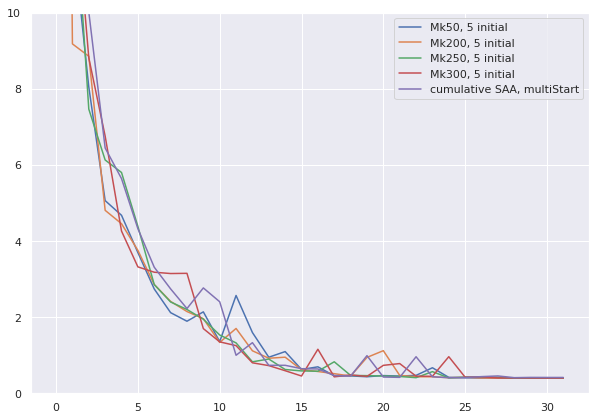

In [60]:
plt.figure(figsize=(10,7))

#plt.plot(avg_sugg_obj_initial5_Mk10_Mj1[3:], label="Mk10, 5 initial")
plt.plot(avg_sugg_obj_initial5_Mk50_Mj1[3:], label="Mk50, 5 initial")
plt.plot(avg_sugg_obj_initial5_Mk200_Mj1[3:], label="Mk200, 5 initial")

plt.plot(avg_sugg_obj_initial5_Mk250_Mj1[3:], label="Mk250, 5 initial")
plt.plot(avg_sugg_obj_initial5_Mk300_Mj1[3:], label="Mk300, 5 initial")

plt.plot(avg_sugg_obj_cumulative_multi[3:], label="cumulative SAA, multiStart")
plt.ylim(ymin=0, ymax=10)
plt.legend()
plt.show()

### Plotting with error 

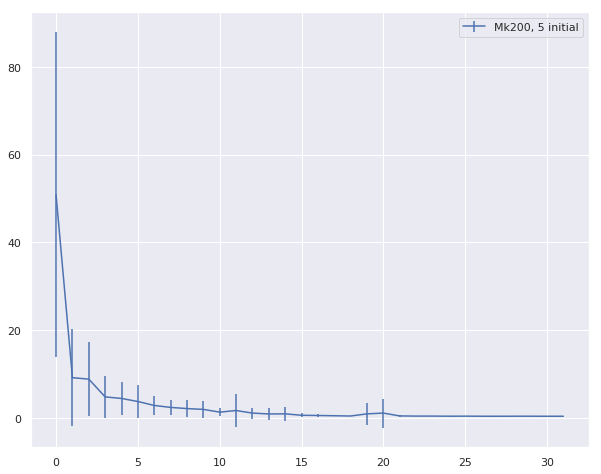

In [46]:
plt.figure(figsize=(10,8))
plt.errorbar([iter_num for iter_num in range(len(avg_sugg_obj_initial5_Mk200_Mj1)-3)],
             avg_sugg_obj_initial5_Mk200_Mj1[3:],
            sugg_obj_initial5_Mk200_Mj1_std_err[3:], label = "Mk200, 5 initial")
# plt.errorbar([iter_num for iter_num in range(len(avg_sugg_obj_initial5_Mk200_Mj1)-3)],
#              avg_sugg_obj_initial5_Mk10_Mj1[3:],
#             sugg_obj_initial5_Mk10_Mj1_std_err[3:], label = "Mk200, 5 initial")
plt.legend()

In [40]:
sugg_obj_initial5_Mk200_Mj1_std_err

array([2.85603374e+01, 3.73244577e+01, 5.01610427e+01, 3.70584240e+01,
       1.10316574e+01, 8.51452294e+00, 4.87031745e+00, 3.84169669e+00,
       3.66480016e+00, 2.23218744e+00, 1.68681639e+00, 1.85814357e+00,
       1.92801421e+00, 9.10209236e-01, 3.85657421e+00, 1.23669979e+00,
       1.26398184e+00, 1.57333925e+00, 5.04131342e-01, 3.62600484e-01,
       1.56833209e-01, 9.10510505e-02, 2.48517533e+00, 3.29239891e+00,
       1.42917828e-01, 6.80301419e-02, 6.29655457e-02, 3.03970909e-02,
       6.47994721e-02, 5.15467952e-03, 2.69222387e-03, 3.85427033e-02,
       3.83527645e-02, 1.33016098e-03, 1.37192483e-03])

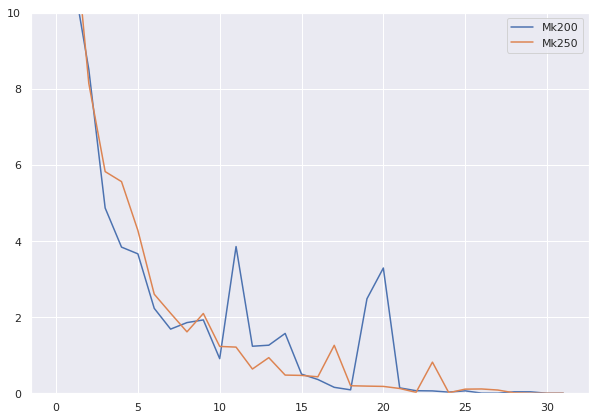

In [57]:
plt.figure(figsize=(10,7))

#plt.plot(sugg_obj_initial5_Mk10_Mj1_std_err[3:],label="Mk10")
#plt.plot(sugg_obj_initial5_Mk50_Mj1_std_err[3:],label="Mk50")
plt.plot(sugg_obj_initial5_Mk200_Mj1_std_err[3:],label="Mk200")
plt.plot(sugg_obj_initial5_Mk250_Mj1_std_err[3:],label="Mk250")
#plt.plot(sugg_obj_initial5_Mk300_Mj1_std_err[3:],label="Mk300")
#plt.plot(sugg_obj_cumulative_saa_multi_std_err[3:], label="cumulative SAA")
plt.ylim(ymin=0, ymax=10)
plt.legend()


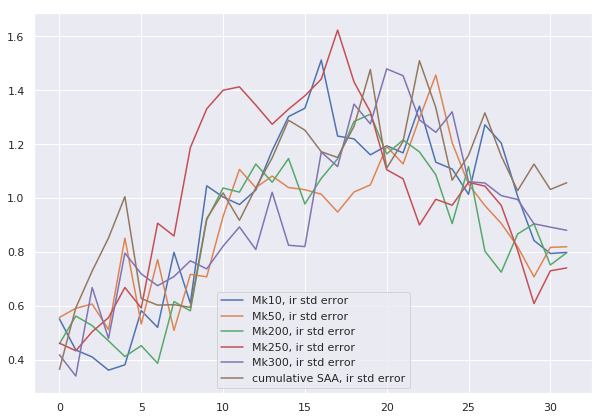

In [59]:
plt.figure(figsize=(10,7))
plt.plot(irs_initial5_Mk10_Mj1_std_err[3:], label="Mk10, ir std error")
plt.plot(irs_initial5_Mk50_Mj1_std_err[3:], label="Mk50, ir std error")
plt.plot(irs_initial5_Mk200_Mj1_std_err[3:], label="Mk200, ir std error")
plt.plot(irs_initial5_Mk250_Mj1_std_err[3:], label="Mk250, ir std error")
plt.plot(irs_initial5_Mk300_Mj1_std_err[3:], label="Mk300, ir std error")
plt.plot(irs_cumulative_saa_multi_std_err[3:], label="cumulative SAA, ir std error")
plt.legend()
plt.show()